# Differential Privacy Primer

### What characterizes sensitive data in your definition?
Here we have the scope of sensitive data outlined by European Commission as of today. Here is a block quote from European Commission’s website. (European Commission, n.d.): https://commission.europa.eu/law/law-topic/data-protection/reform/rules-business-and-organisations/legal-grounds-processing-data/sensitive-data/what-personal-data-considered-sensitive_es 

The following personal data is considered ‘sensitive’ and is subject to specific processing conditions:
- personal data revealing racial or ethnic origin, political opinions, religious or philosophical beliefs;
- trade-union membership;
- genetic data, biometric data processed solely to identify a human being;
- health-related data;
- data concerning a person’s sex life or sexual orientation.


### What does privacy mean in automatic data processing? 
In the context of automatic data processing, the territory of privacy extends beyond individual personal data stored in a securely protected space (e.g. server, database, etc.) to aggregate statistical summaries published in the public space.
With today’s technologies, even if we do not have data regarding an individual person, aggregate statistics of a dataset, which contains the individual and others, can reveal a significant amount of information about the particular individual contained in the dataset (Vadhan, 2020).

In other words, even if there is no public disclosure about the privacy data at the level of the individual data, summary statistics of the aggregate dataset that contains the individual data can compromise the privacy. (Dwork, 2008, p. 1)
Simply put, privacy in the context of automatic data processing can be compromised without releasing any individual information about a particular person. This is the issue that we need to address.

The theme can be encapsulated into the following one single question: How can we produce statistical information of an aggregate dataset without compromising the privacy of individuals? 


### What is the proposed model?

The proposed model of Differential Privacy attempts to provide “ad omnia guarantee”. In other words, it aims at guaranteeing indistinguishable aggregate statistical properties in the context of automated data processing. And “ad omnia guarantee” can be defined in the following mathematical formula:

Definition 1. A randomized function K gives ε-differential privacy if for all data sets D1 and D2 differing on at most one element, and all S ⊆ Range(K), 

> Pr[K(D1) ∈ S] ≤ exp(ε) × Pr[K(D2) ∈ S] (1)

Here, “[t]he mechanism K adds appropriately chosen random noise to” the dataset. (Dwork, 2008, p. 3) Therefore, K is a random function mechanism of the differential privacy. And ε measures the loss of privacy and the determinant of the robustness of the differential privacy. (Dwork, 2008, p. 2) 

ε=0 represents complete privacy. The smaller the ε, the more robust the differential privacy would be. 

One essential feature of the ad omnia guarantee of differential privacy is that the behavior of the mechanism K is independent of any adversary’s knowledge. (Dwork, 2008, p. 3)

In other words, the ad omnia guarantee of Differential Privacy is “a very strong guarantee, since it is a statistical property about the behavior of the mechanism and therefore is independent of the computational power and auxiliary information available to the adversary/user.” (Dwork, 2008, pp. 2-3)

These properties extend to group privacy. (Dwork, 2008, p. 3)



Nevertheless, there are some limitations of differential privacy.

First, there is a trade-off between differential privacy and the accuracy. The smaller the ε, the less the accuracy would be. This trade-off can be alleviated by increasing the size of the dataset. 

“For each sample size, as the epsilon value decreases, that is, as the choice is made to reduce the loss of privacy, the error increases. This error represents, in percentage terms, the average variability that exists between the true value in the sample and the value obtained from applying differential privacy. In turn, it is observed that as the sample size increases (last graph), at the same value of the epsilon parameter, the error decreases.” (Salaberry, n.d.)

Second, differential privacy is not an absolute guarantee of privacy. 

“differential privacy ensures that only a limited amount of additional k is incurred by participating in the socially beneficial databases.” (Dwork, 2008, p. 3)



Now, the objective is to determine the size of noise that can make statistical property of aggregate dataset insensitive to change in a row of the dataset.

In order to determine how much noise should be incorporated into the data in order to balance the loss of privacy, the sensitivity of the weight of an individual's data in the calculations made must be measured (Dwork, 2008).

Where the query is a function f, and the database is X, the true answer is the value f(X), sensitivity is defined as follows.

Definition 2. For f :D →R_k, the sensitivity of f is

>〖∆f= max┬(D_1 D_2 )〗⁡〖‖f(D_1 )-f(D_2)‖_1 〗for all D_1,D_2 differing in at most one element.

“Note that sensitivity is a property of the function alone, and is independent of the database. The sensitivity essentially captures how great a difference (between the value of f on two databases differing in a single element) must be hidden by the additive noise generated by the curator.”

The scaled symmetric exponential distribution with standard deviation √2  ∆f/ε, denoted Lap( ∆f/ε), has mass at x proportional to e^((-|x|(ε/Δf))). … On query function f the privacy mechanism K responds with f(X) + (〖Lap( ∆f/ε))〗^k adding noise with distribution Lap( ∆f/ε) independently to each of the k components of f(X). 

Theorem 1. For f : D → R_k, the mechanism K_f that adds independently generated noise with distribution  Lap( ∆f/ε) to each of the k output terms enjoys ε-differential privacy. (Dwork, 2008, p. 5)


### Practice

#### Dataset 
I used the dataset from the following link(Games, Witten, Hastie, & Tibshirani, 2017). https://r-data.pmagunia.com/dataset/r-dataset-package-islr-default#:~:text=The%20Default%20data%20set%20is,into%20a%20variable%20called%20Default.

The dataset contains 4 variables: default, student, income, and bank account balance and has 10,000 observations.

I found the information about income and bank account balance relevant to sensitive data.

I performed the two types of analyses. 
- Laplace Mechanism's impact on the dataset: 
- Laplace Mechanism's impact on the model results of Logistic Regression


In [1]:
# import tensorflow as tf
# from tensorflow import keras

# import os
# import tempfile
#import statsmodels.api as sm

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score




In [2]:
df_original = pd.read_csv('https://r-data.pmagunia.com/system/files/datasets/dataset-63314.csv')

In [3]:
%matplotlib inline

In [4]:
!pip install opendp-smartnoise seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 193 kB 7.4 MB/s 
     |████████████████████████████████| 112 kB 51.3 MB/s 
     |████████████████████████████████| 85 kB 1.9 MB/s 
     |████████████████████████████████| 12.7 MB 38.0 MB/s 
     |████████████████████████████████| 41 kB 307 kB/s 
     |████████████████████████████████| 172 kB 16.0 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141231 sha256=94e8b4d21d65eacfbc431bba6606a7b3c879e1d30bd4b9df1613ea9bea56e6eb
  Stored in directory: /root/.cache/pip/wheels/c8/d0/ab/d43c02eaddc5b9004db86950802442ad9a26f279c619e28da0
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=ed706b48244ab231a231f72c10e6bbd819c8619ad97ef7d2eb80948cf7f3d5d1
  Stored in directory: /root/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successf

In [5]:

import opendp.smartnoise.core as sn
%config InlineBackend.figure_format = 'retina'


In [6]:
df_original.shape 

(10000, 4)

In [7]:
import copy

In [8]:
df=copy.deepcopy(df_original)

In [9]:
df.head(3)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947


In [10]:
df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [11]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


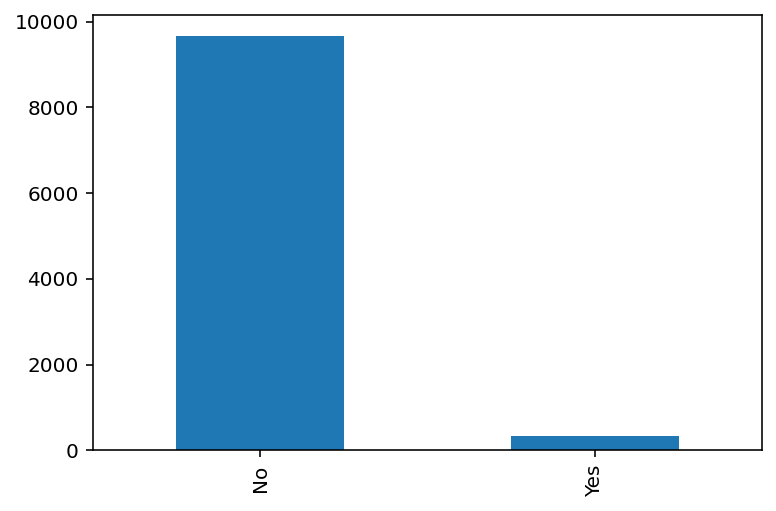

In [12]:
df['default'].value_counts().plot.bar()

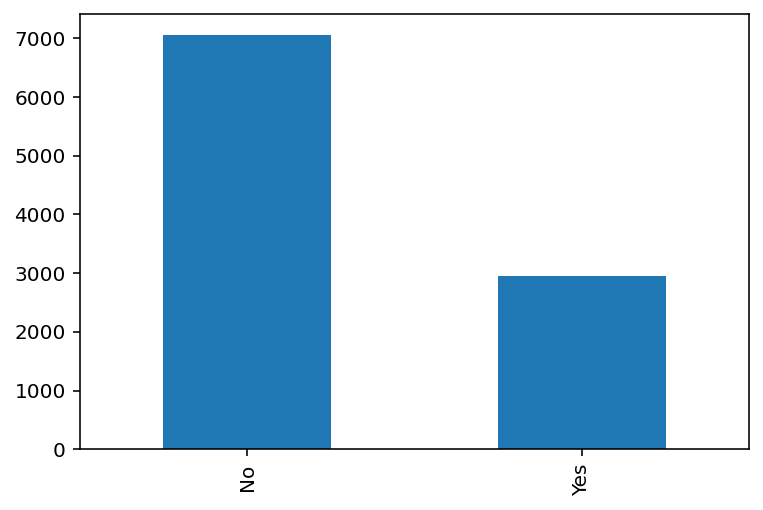

In [13]:
df['student'].value_counts().plot.bar()

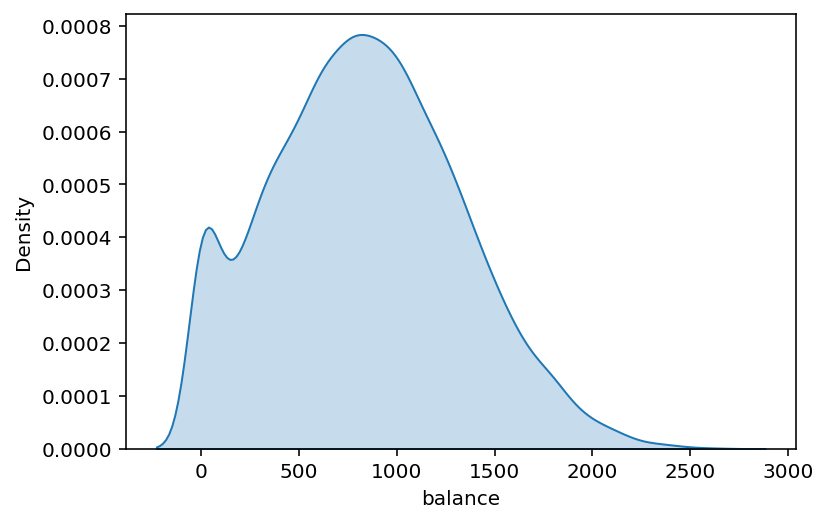

In [14]:
sns.kdeplot(df['balance'],shade=True)
plt.show()

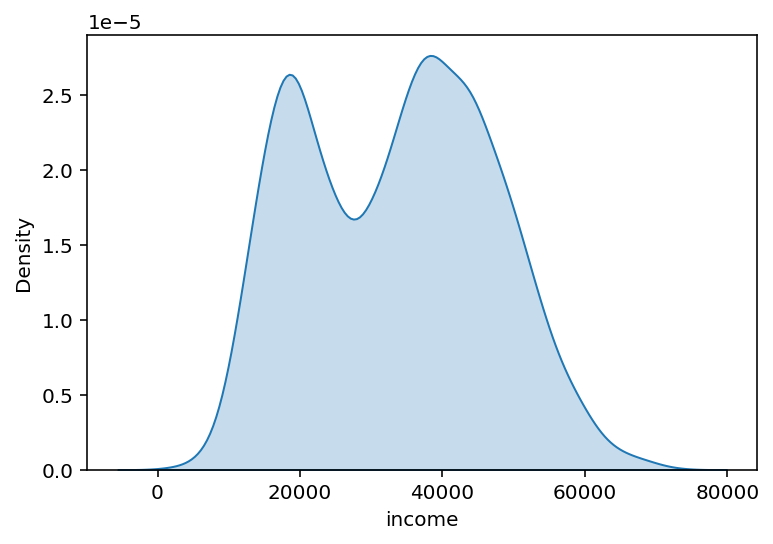

In [15]:
sns.kdeplot(df['income'],shade=True)
plt.show()

In [16]:
default=df['default'].unique()


In [17]:
df['default'].replace(to_replace=default, value=[0, 1], inplace=True)
df['default'].unique()

array([0, 1])

In [18]:
student=df['student'].unique()

In [19]:
df['student'].replace(to_replace=student, value=[0, 1], inplace=True)
df['student'].unique()

array([0, 1])

Since ‘income’ is a continuous numeric data, I allocated the ‘income’ data into 10 bins of categorical data.   

In [20]:
min_price = df["income"].min()
max_price = df["income"].max()
income_bins = np.linspace(min_price, max_price, 11)
income_labels = list({ i for i in range(0,10)})
income_categories = [f'Income bin {str(x+1)}' for x in income_labels]
df["income"] = pd.cut(df["income"], bins=income_bins, labels=income_categories, include_lowest=True)


In [21]:
income_categories

['Income bin 1',
 'Income bin 2',
 'Income bin 3',
 'Income bin 4',
 'Income bin 5',
 'Income bin 6',
 'Income bin 7',
 'Income bin 8',
 'Income bin 9',
 'Income bin 10']

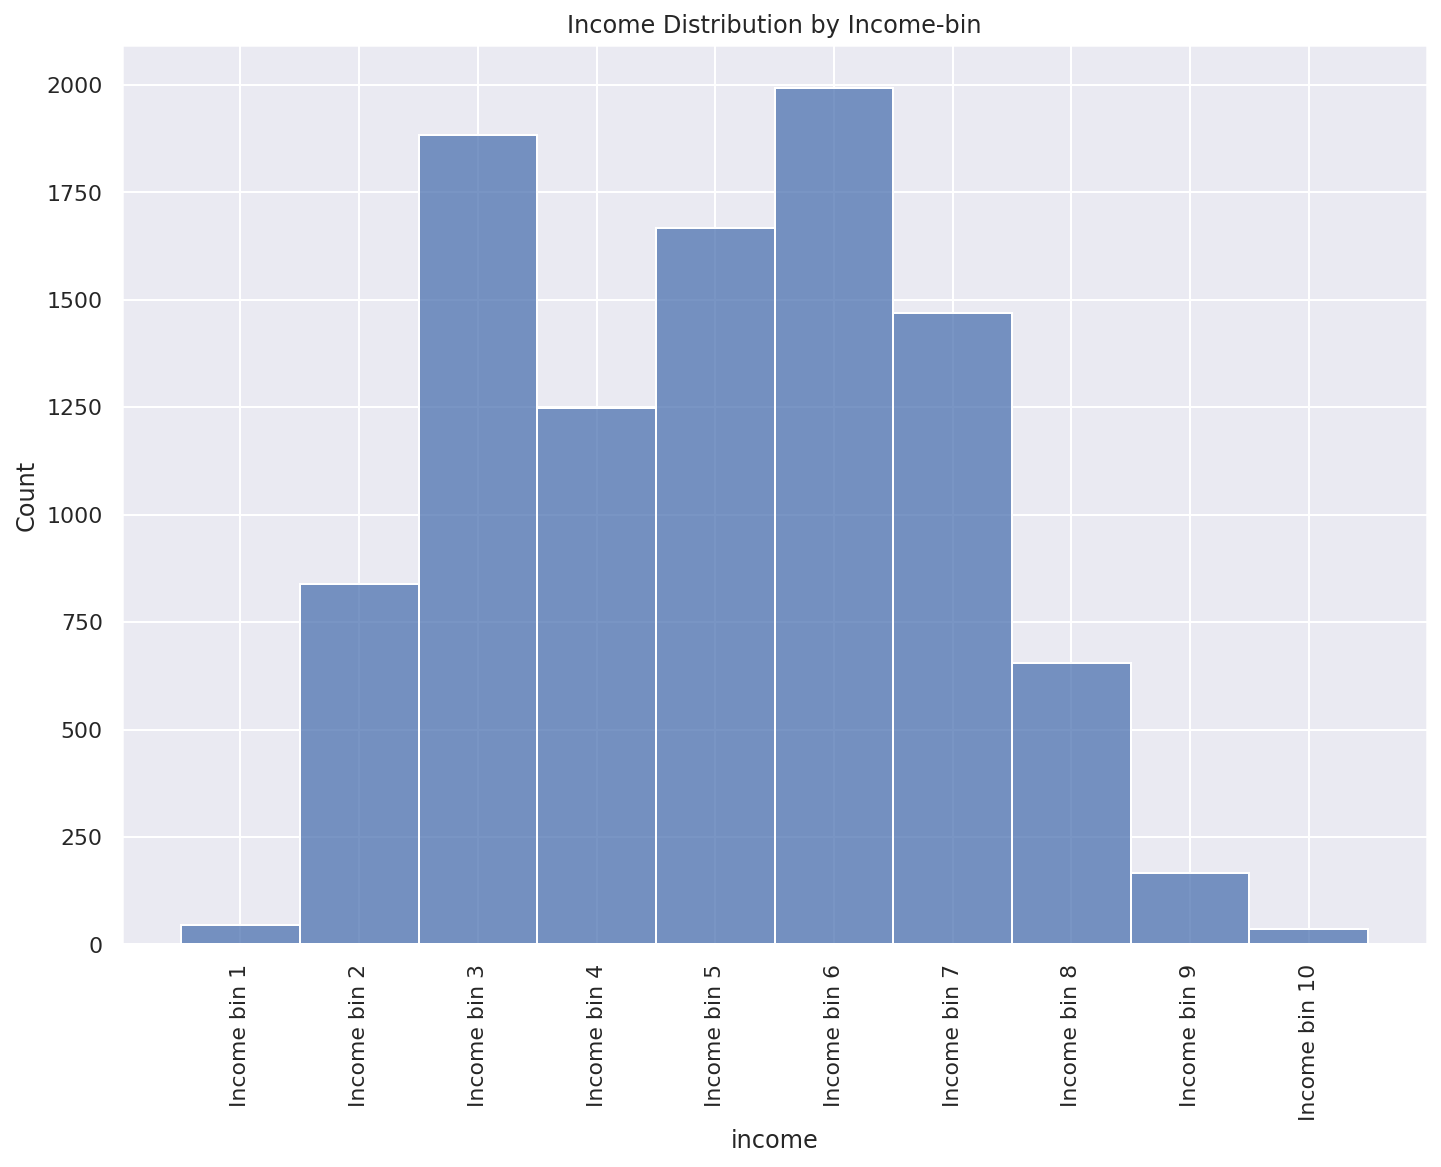

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation=90)
ax = sns.histplot(data=df, x="income", palette="Set3").set(title='Income Distribution by Income-bin')

In [23]:
sample_size = int(df.shape[0]*0.2)
sample = df.sample(n = sample_size, random_state=0)
sample.to_csv("samplefile", index=False)


In [24]:
#observamos la muestra generada, donde la edad se encuentra recategorizada
sample=pd.read_csv('/content/samplefile')
sample.head(5)

,default,student,balance,income
0,0,1,0.000000,Income bin 2
1,0,0,396.985985,Income bin 8
2,0,0,1046.416673,Income bin 7
3,0,0,836.343137,Income bin 5
4,0,1,534.692907,Income bin 3


In [25]:
var_names=df.columns.values.tolist()
var_names

['default', 'student', 'balance', 'income']

In [26]:
sample.shape

(2000, 4)

In [27]:
#Apply Differential Privacy to the sample of Income Distribution
def dp_histo(epsilon, var_names): #the choice of epsilon value

    with sn.Analysis(protect_floating_point=False) as analysis:
        data = sn.Dataset(path = '/content/samplefile', column_names = var_names) #'/content/samplefile'
        nsize = sample_size    

# the histogram method is used because it is very sensitive to changes (noise) in the data
        inc_prep = sn.histogram(data['income'], #histogram w/o privacidad diferencial
                categories = income_categories, null_value = "-1")
        #apply the Laplace mechanism of Differential Privacy
        inc_histogram2 = sn.laplace_mechanism(inc_prep, privacy_usage={"epsilon": epsilon, "delta": .000001})

    analysis.release()
    
    return  inc_histogram2.value 

# a function to calculate the scale of absolute error (average percentage difference between the classes of the histogram)
def perc_error(true_col, dp_col):
    return sum(abs(true_col - dp_col)) / sum(true_col) * 100

In [28]:
# implement Differential Privacy
epsilon = 0.1

laplace_counts = dp_histo(epsilon, var_names) 

print("Histrogram of Income bins after the Laplace differential privacy:     " + str(laplace_counts.astype(int)))

Histrogram of Income bins after the Laplace differential privacy:     [  5 190 362 259 302 368 317 127  72   3  14]


In [29]:
# comparamos la cantidad de casos en cada clase del histograma 
results = pd.DataFrame(index=income_categories)
private_df = pd.read_csv('/content/samplefile')
results['Original_Value'] = private_df['income'].value_counts()
results['Laplace_Mechanism'] = laplace_counts[:len(income_categories)].astype(int)

results

,Original_Value,Laplace_Mechanism
Income bin 1,10,5
Income bin 2,169,190
Income bin 3,371,362
Income bin 4,248,259
Income bin 5,338,302
Income bin 6,403,368
Income bin 7,295,317
Income bin 8,128,127
Income bin 9,32,72
Income bin 10,6,3


In [30]:
# calculamos el error
error_lapl = perc_error(results['Original_Value'], results['Laplace_Mechanism'])
print ('Laplace Mechanism with ε = ' + str(epsilon) + ' : Deviation of dataset without Laplace Mechanism = ' + str(round(error_lapl,1)) +'%')

Laplace Mechanism with ε = 0.1 : Deviation of dataset without Laplace Mechanism = 9.2%


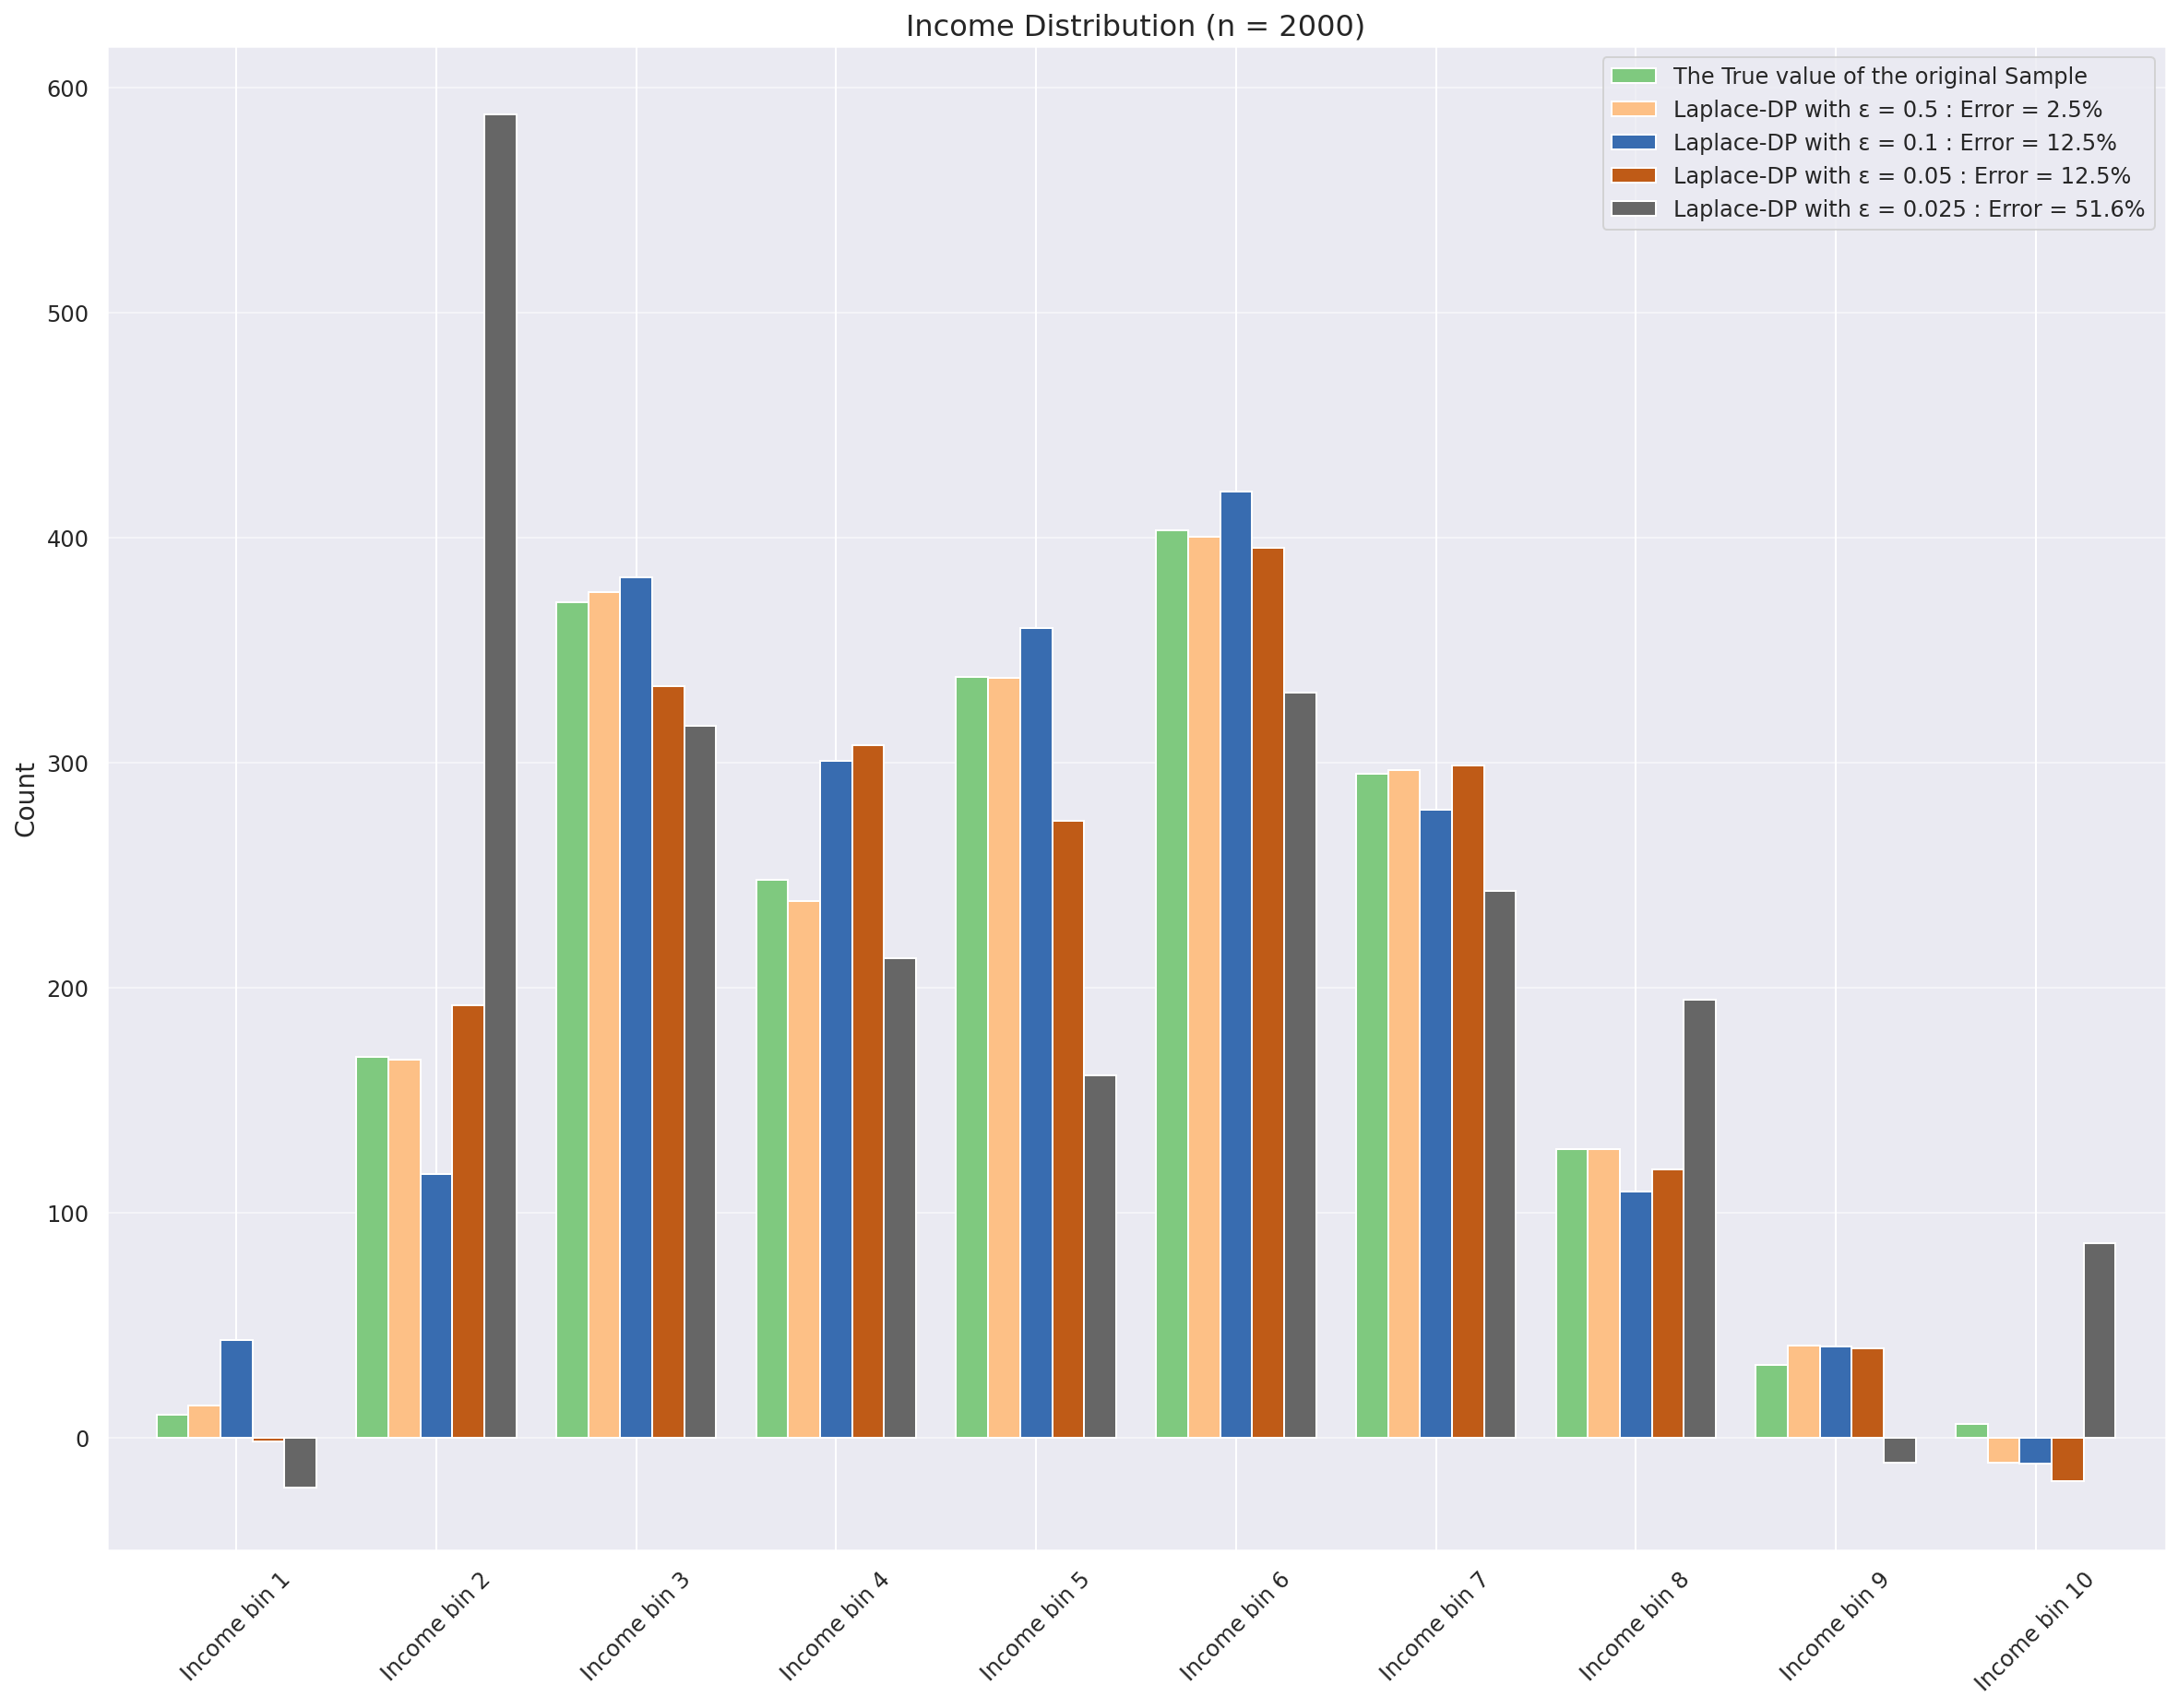

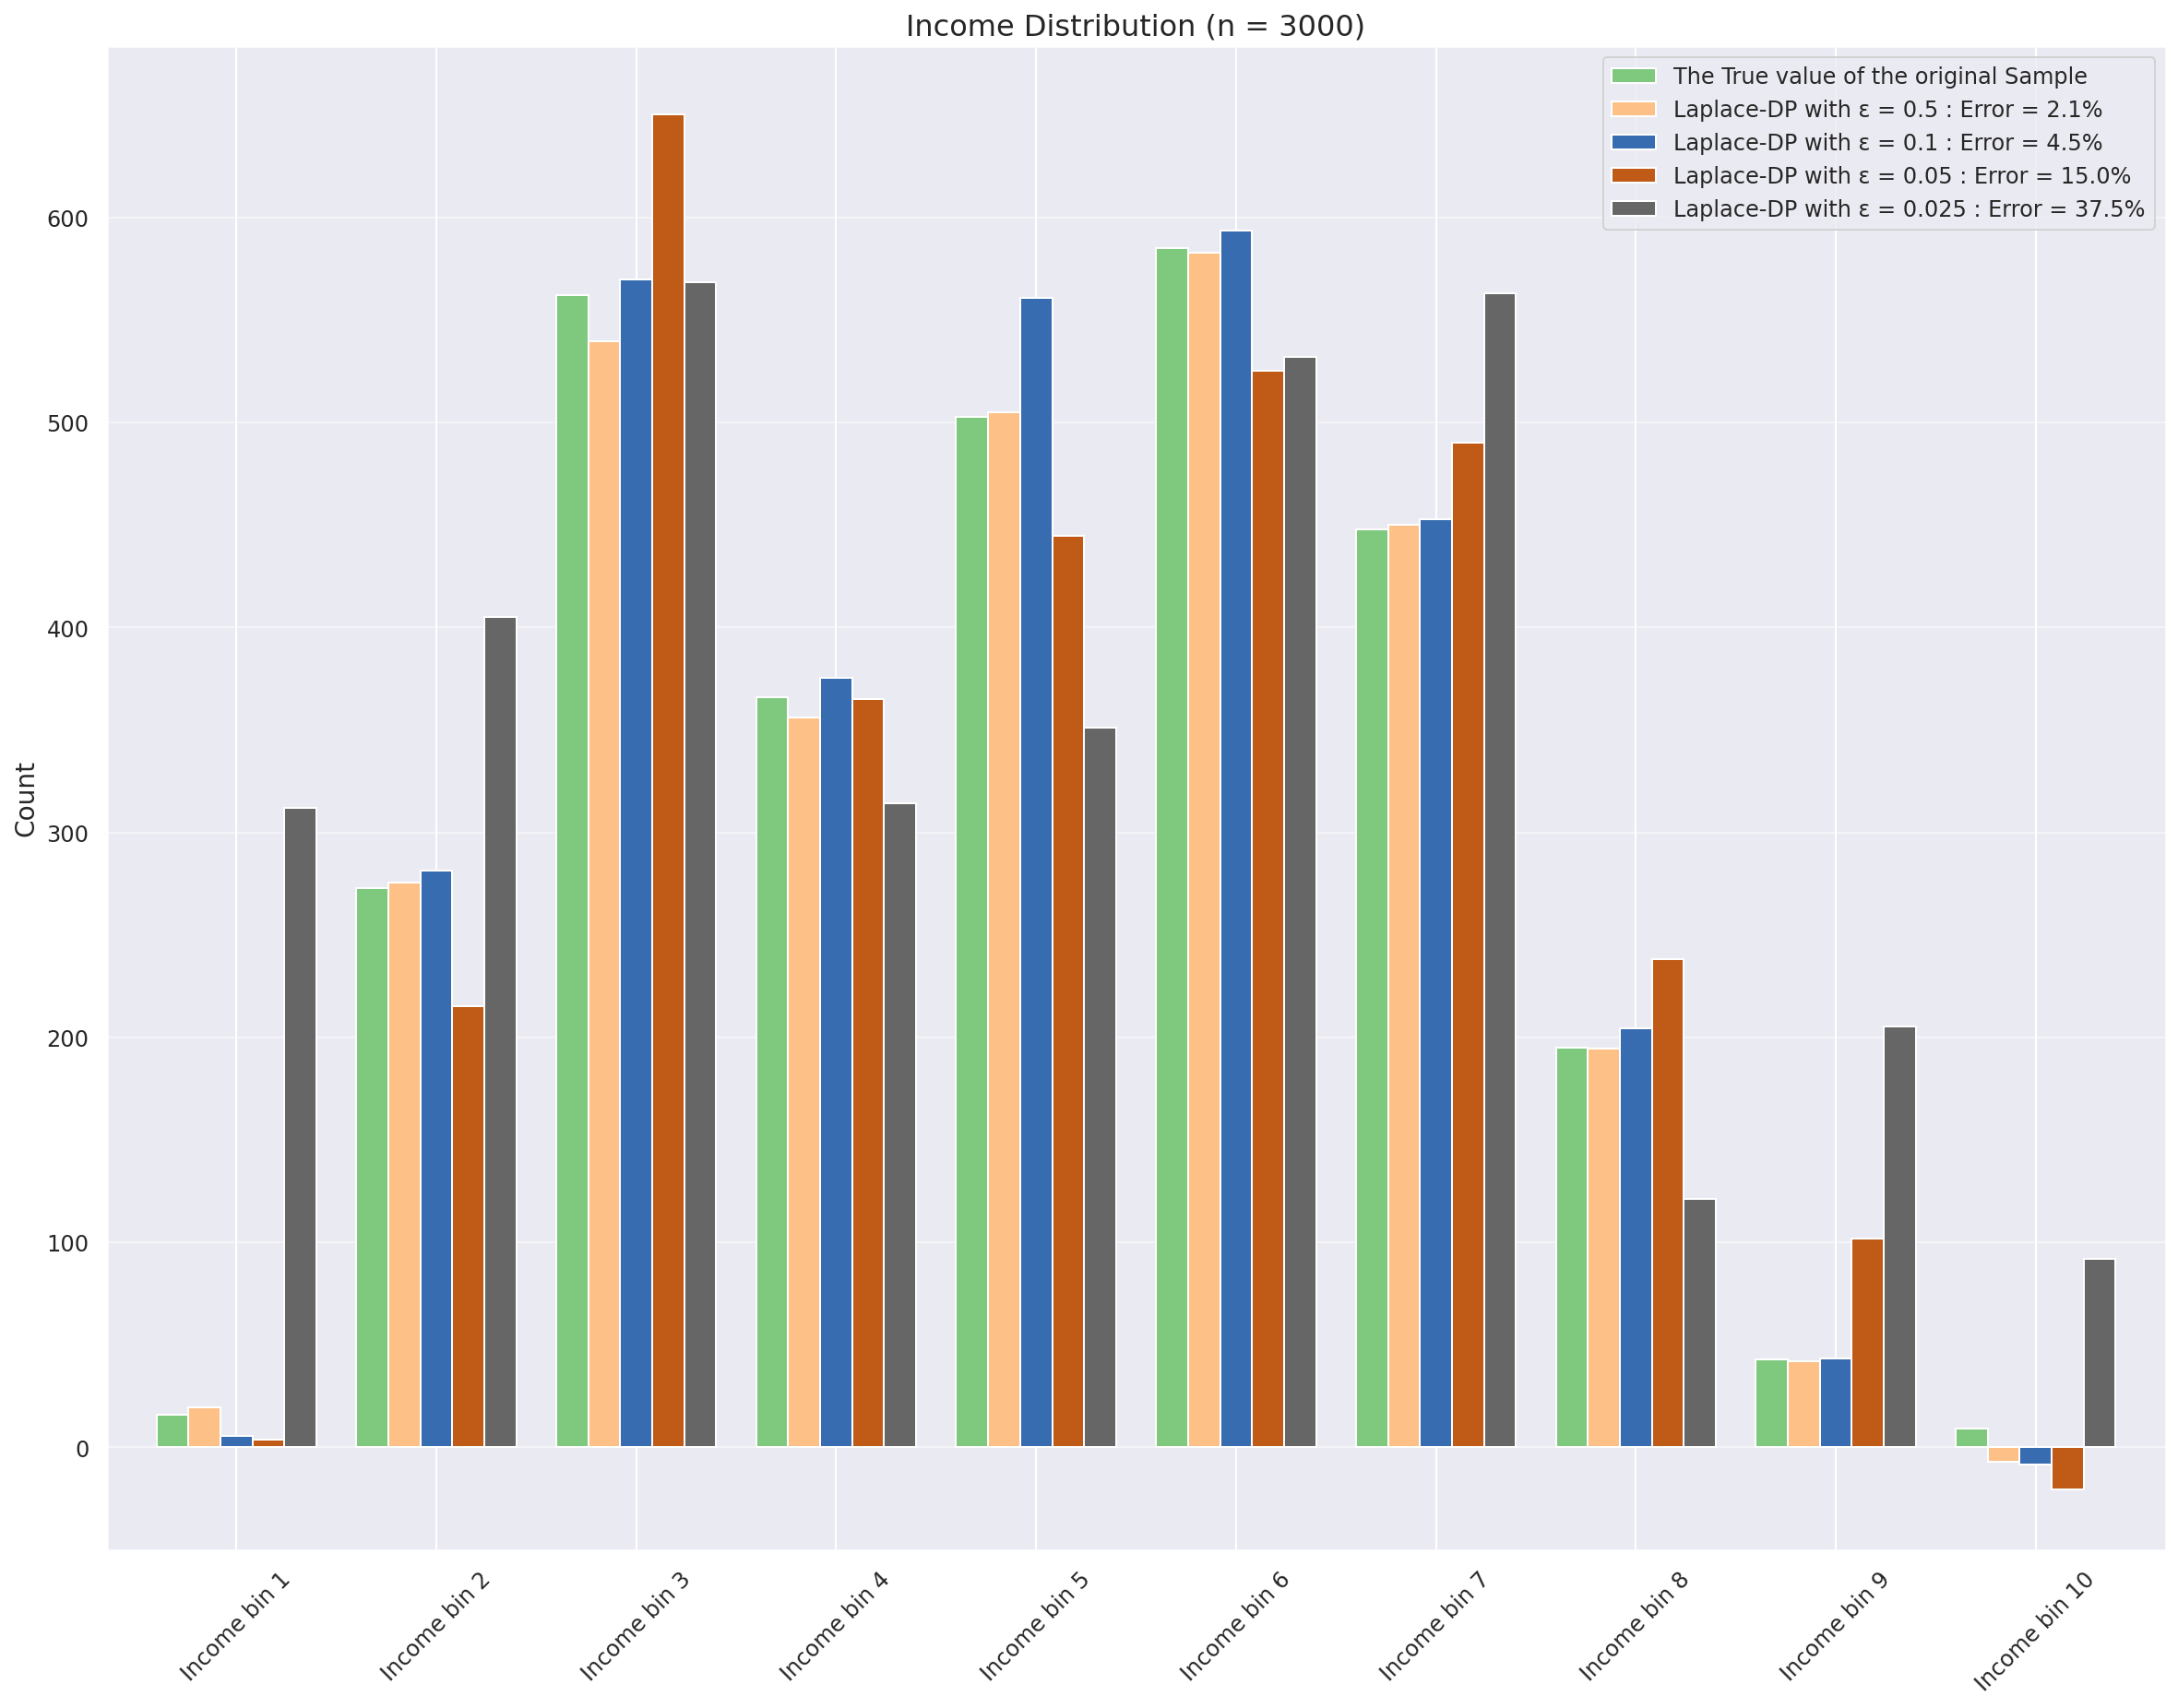

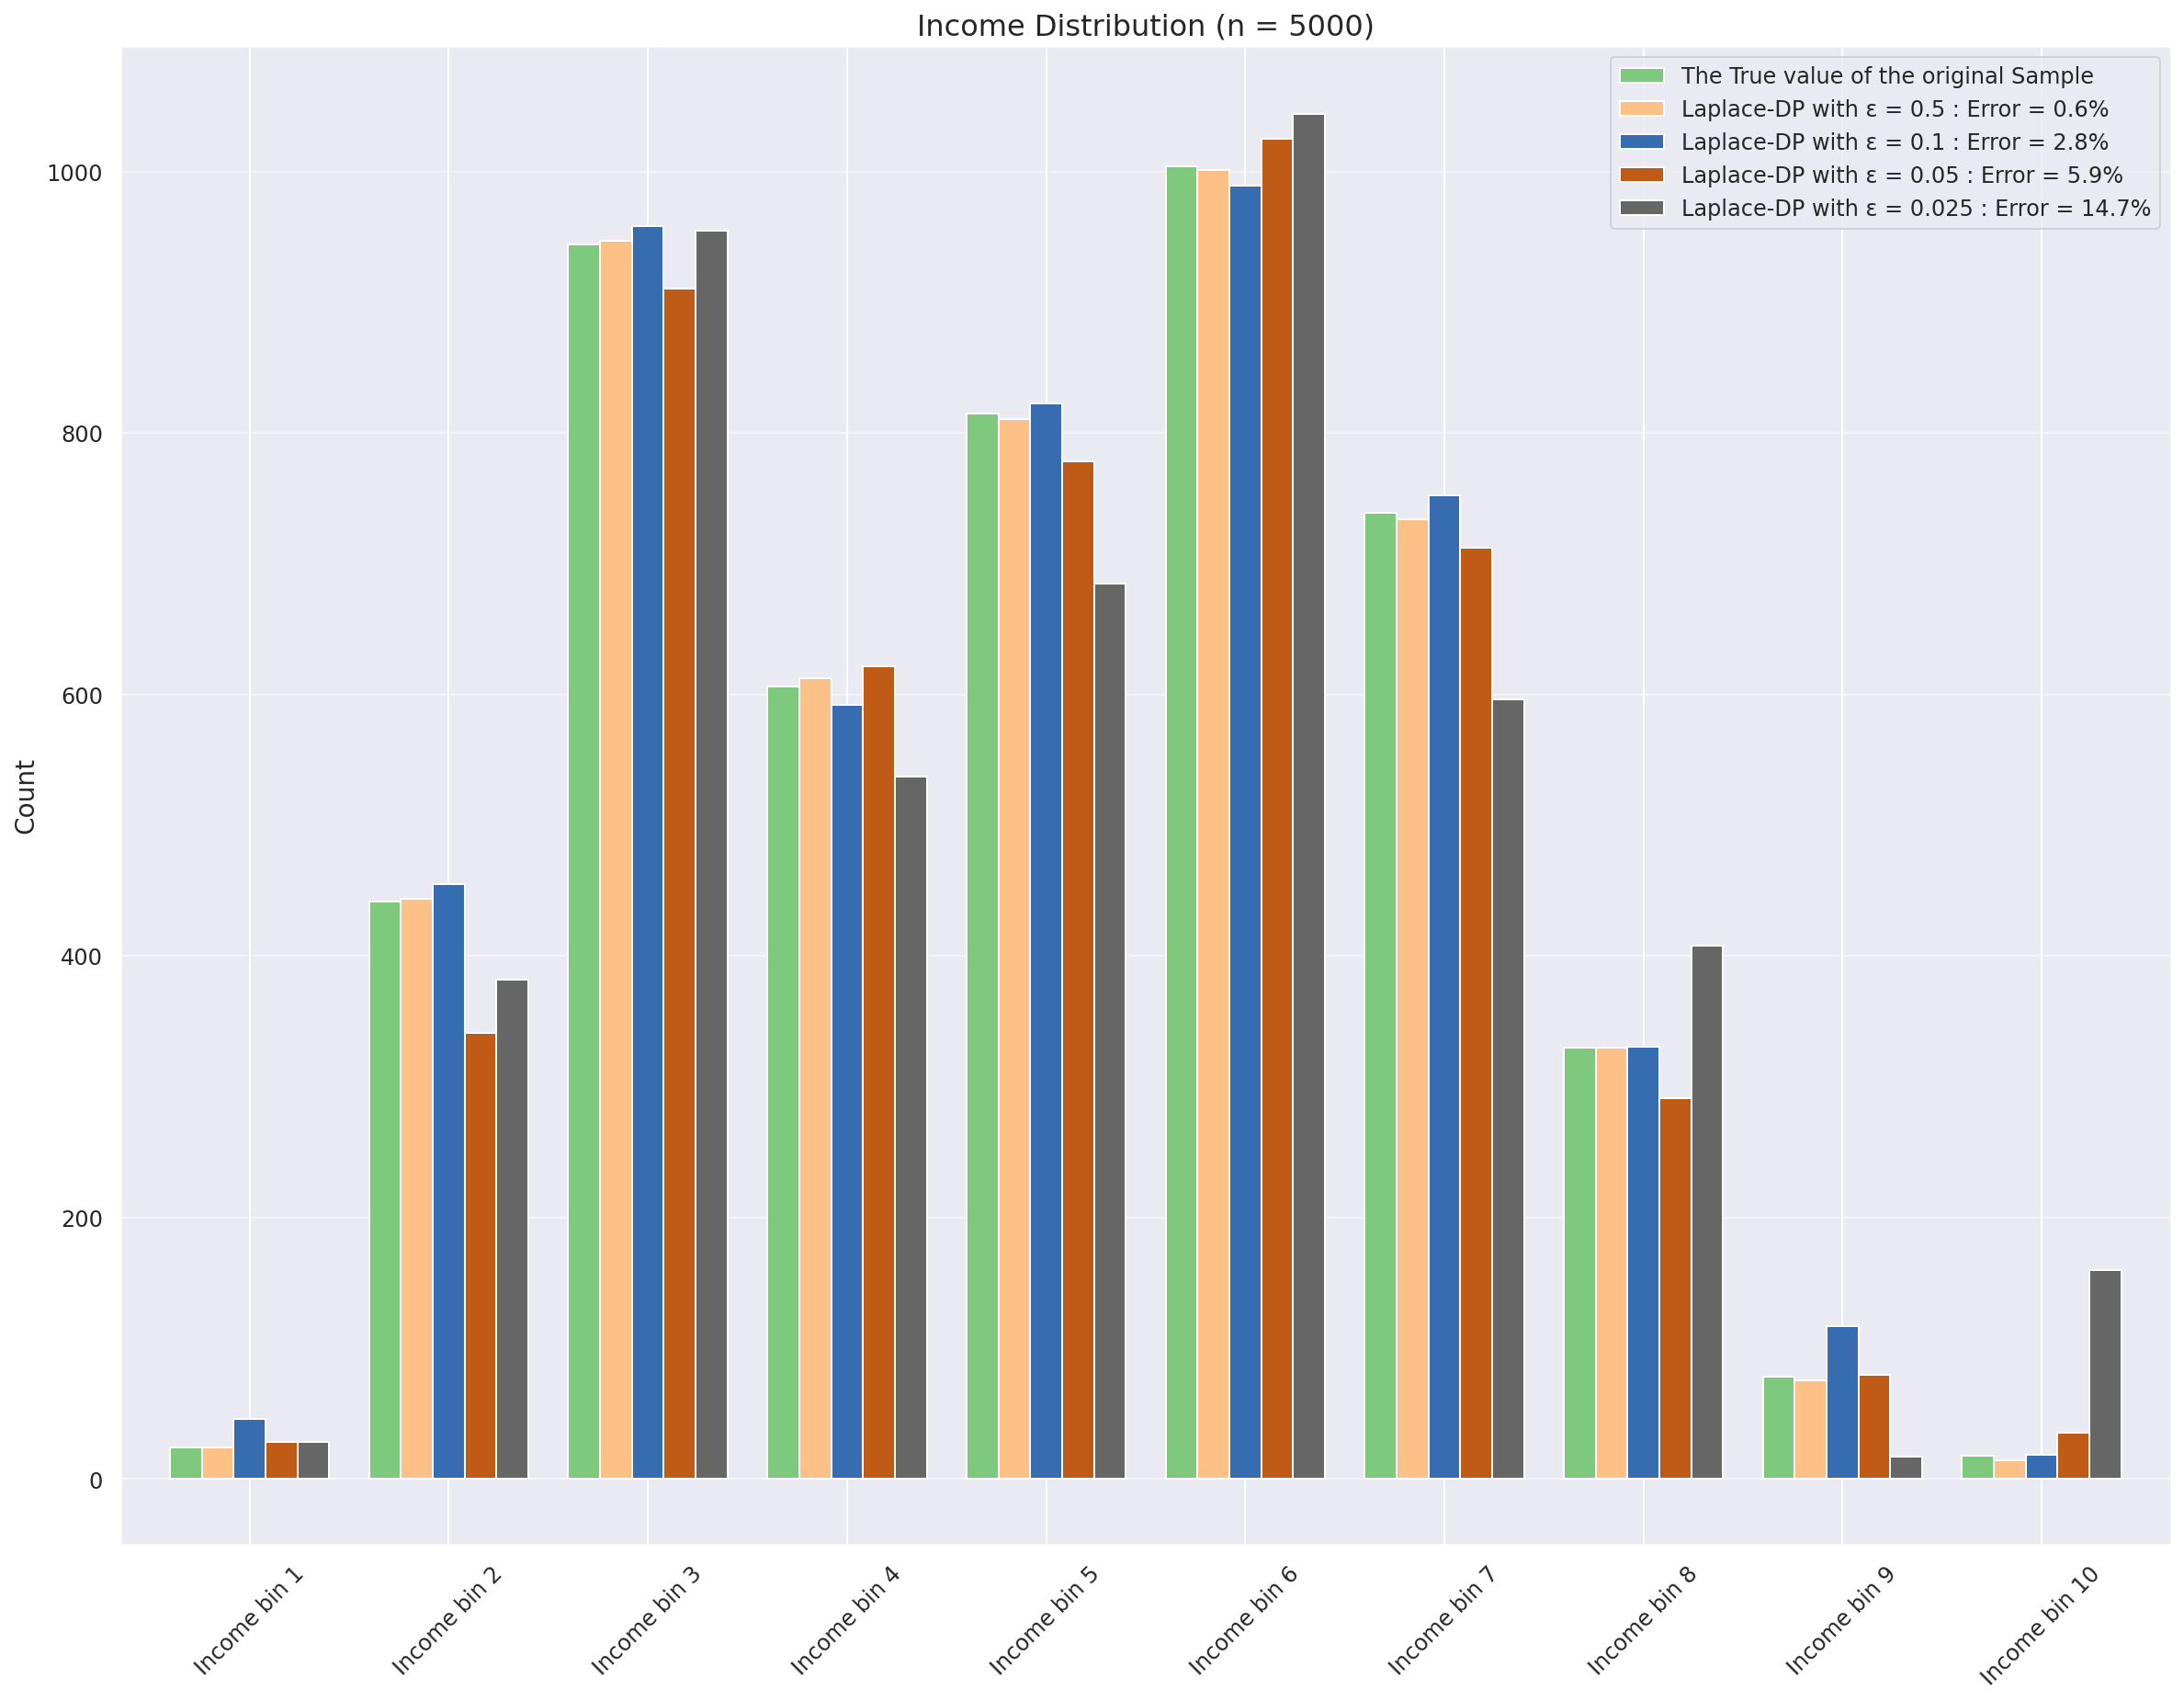

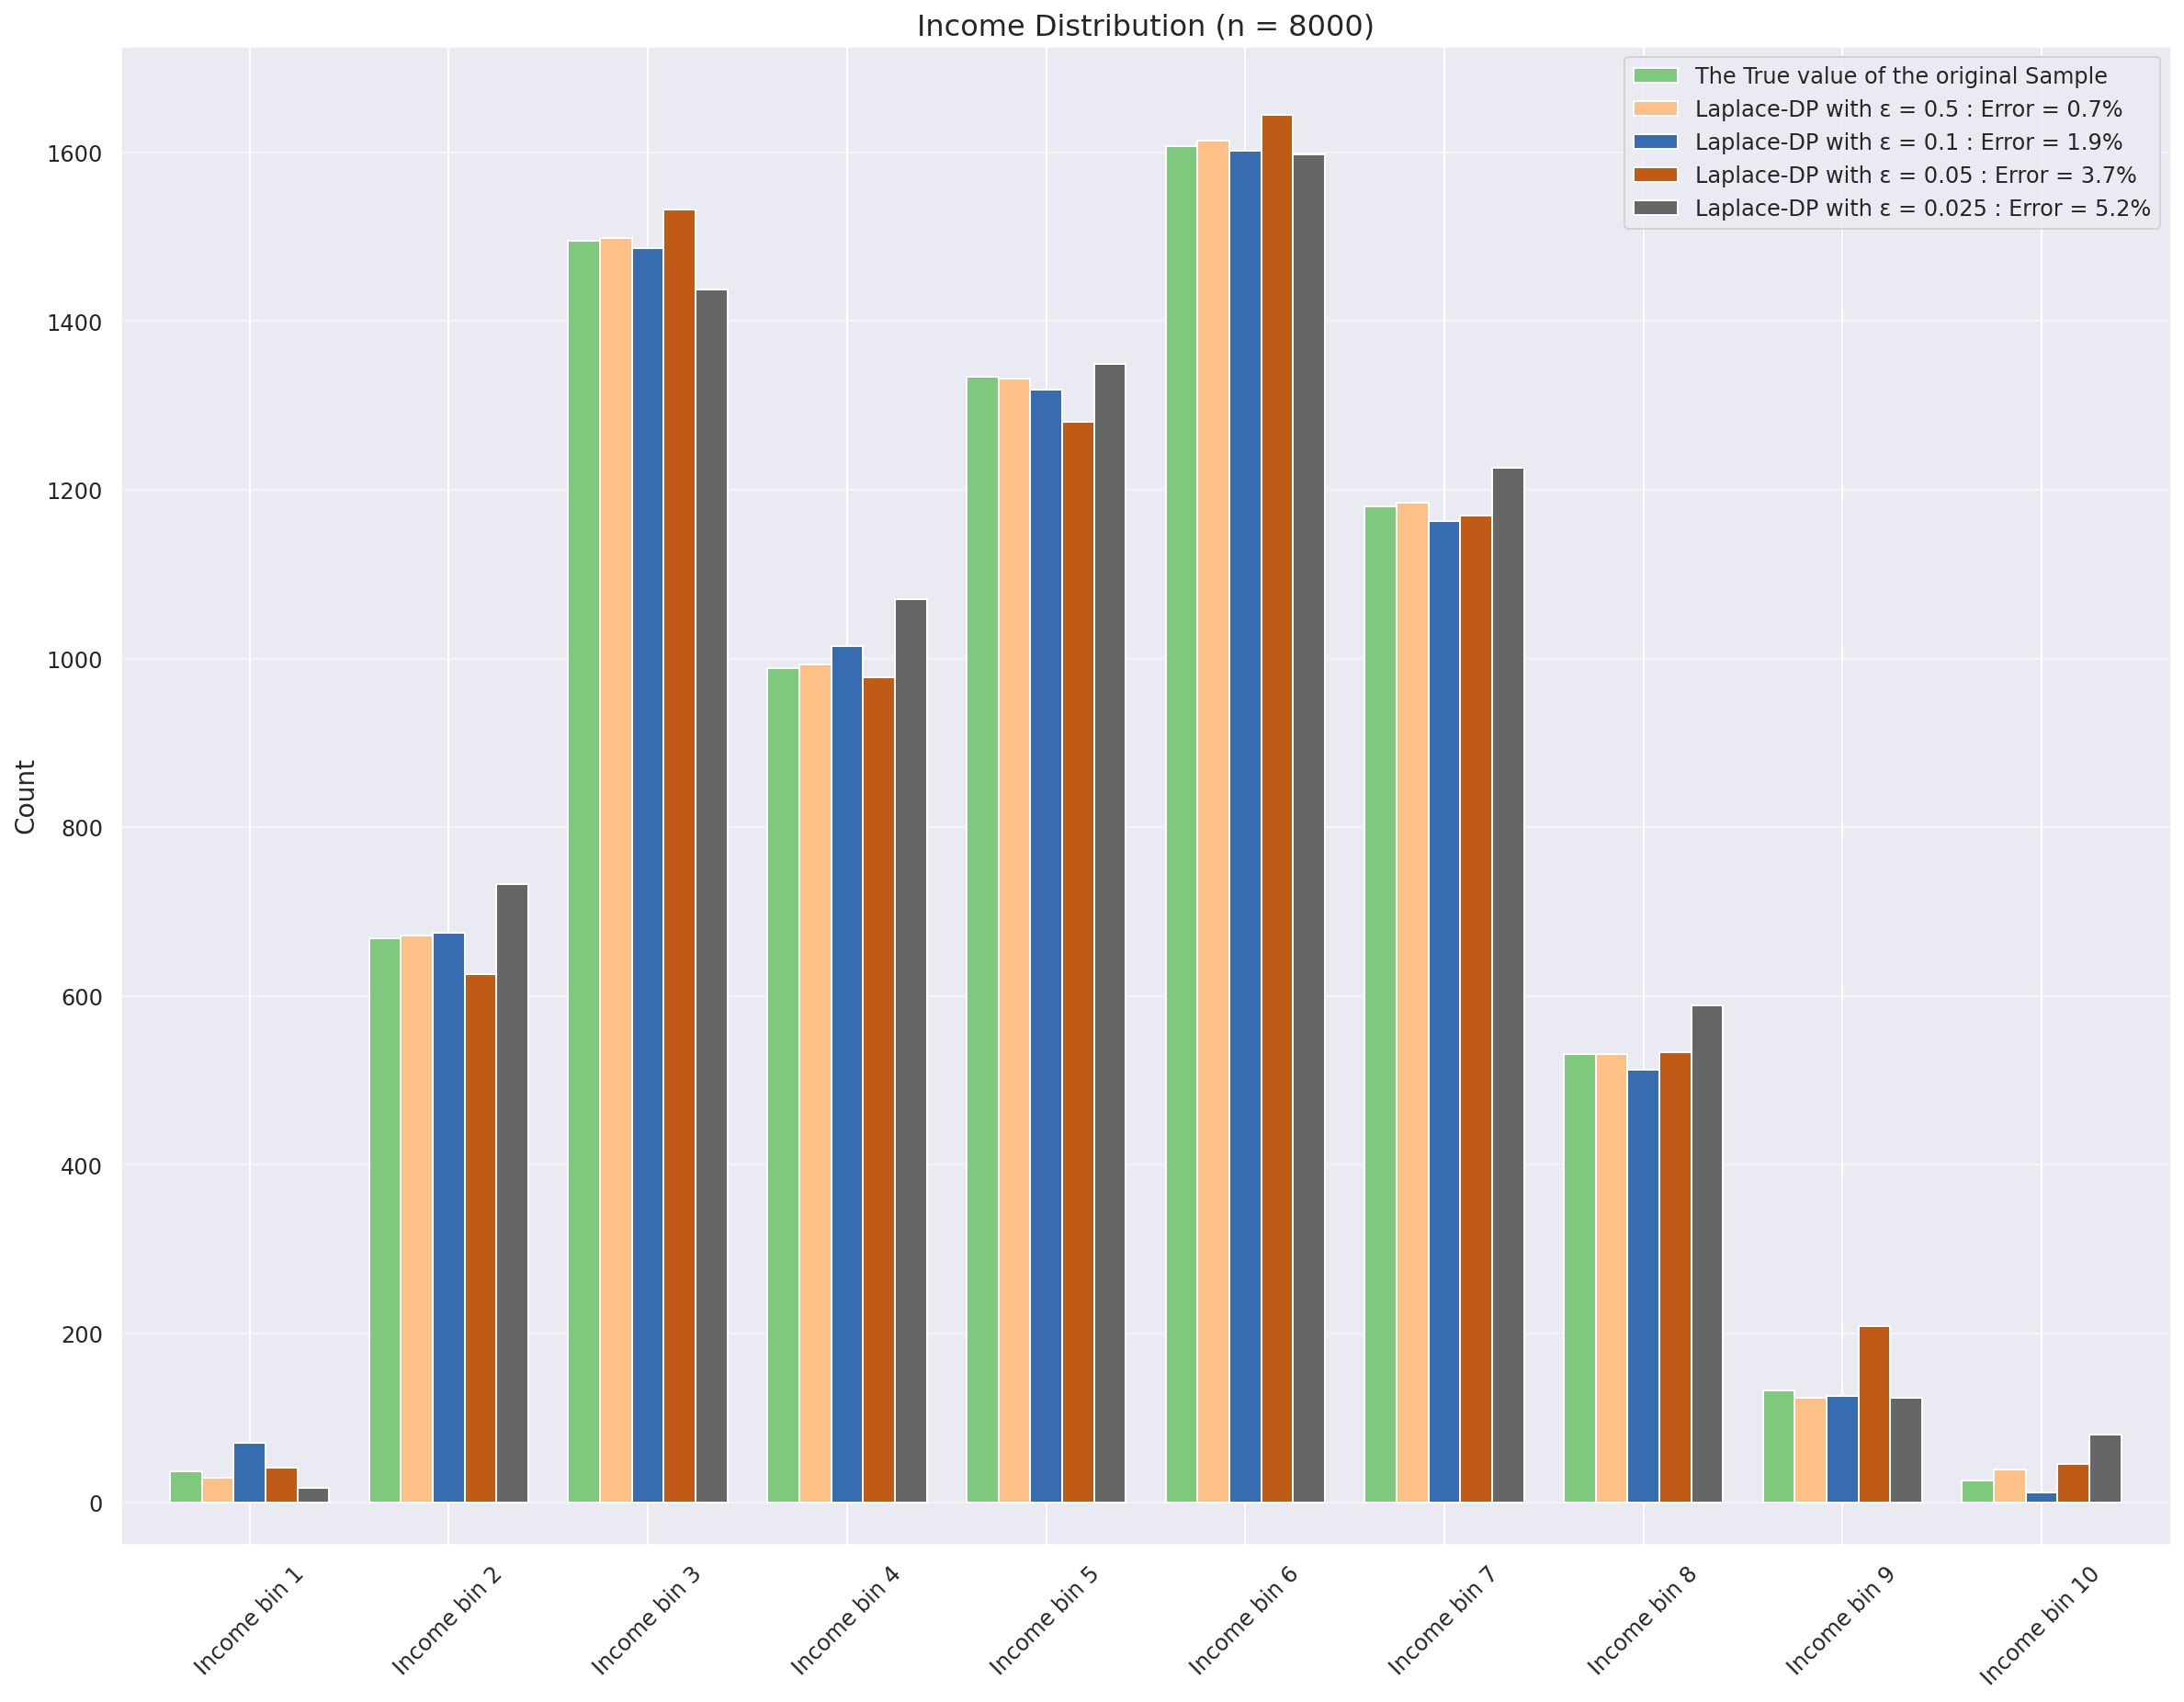

In [31]:
# Now iterate the same process over different sets of (sample size, epsilon) to assess the trade-off bewtween parameters
population=df.shape[0]
sample_sizes = [int(population*0.2), int(population*0.3), int(population*0.5), int(population*0.8)]
epsilons = [0.5, 0.1, 0.05, 0.025]

for sample_size in sample_sizes:
    sample = df.sample(n = sample_size, random_state=0)
    sample.to_csv('samplefile', index=False)

    results = pd.DataFrame(index=income_categories) 
    private_df = pd.read_csv('/content/samplefile')
    results['True'] = private_df['income'].value_counts()

    labels = ['The True value of the original Sample']
    
    for epsilon in epsilons:
        laplace_counts = dp_histo(epsilon, var_names) 

        results['Laplace-DP-'+str(epsilon)] = laplace_counts[:len(income_categories)] 
               
        error = perc_error(results['True'], results['Laplace-DP-'+str(epsilon)])
            
        labels.append('Laplace-DP with ε = ' + str(epsilon) + ' : Error = ' + str(round(error,1)) + '%')

    ax = results.plot.bar(rot=45, figsize=(20, 15), width=0.8, fontsize=12, colormap = 'Accent')
    plt.title('Income Distribution (n = '+str(sample_size)+')', fontsize=16)
    plt.legend(fontsize = 12, labels=labels)
    plt.grid(axis='y', alpha=0.5)
    plt.ylabel('Count', fontsize = 14)
    plt.ylim(-50)
    plt.show()

Above, I presented the results of histograms for 4 different sample sizes: 2,000, 3,000, 5,000, and 8,000. As the sample size increases, the errors declined and the graphs across different epsilons converged. 

One pending issue that I encounter here is that for this case Laplace mechanism generated some negative counts. 

I would need to impose some constraint on the result of the Laplace noise in order to maintain the relevancy of the dataset to the real life situation. This needs to be addressed in the future.


# The Impact of Laplace Differential Privacy on Model results
 

Now, we want to see the impact of the Laplace mechanism on the model.
As an example, we can use the following Logistic Regression on the default dataset that we have been working on. 

> Probability[`default`] = a * `balance` +  intercept

In order to compare the impact of the Laplace mechanism on the classification results, we can use two datasets: the original dataset and that with noise generated by Laplace mechanism on `balance`. 
Here, we will apply noise to the independent variable, `balance`, in order to see the impact on the model, rather than `income`, which is not in the regression model described above.
And we can train the model on these two datasets to see their results.

First, we can apply Laplace mechanism to `balance` in the entire original dataset.


In [32]:
df_laplace=copy.deepcopy(df)

In [33]:
sensitivity = 1
epsilon = 0.5
df_laplace['balance']=df_laplace['balance'] + np.random.laplace(loc=0, scale=sensitivity/epsilon)
df_laplace.head(5)

,default,student,balance,income
0,0,0,729.208479,Income bin 6
1,0,1,816.862390,Income bin 2
2,0,0,1073.231148,Income bin 5
3,0,0,528.932589,Income bin 5
4,0,0,785.337867,Income bin 6


In [34]:
df_original2=copy.deepcopy(df)

In [35]:
original_train_df, original_test_df = train_test_split(df_original2, test_size=0.3)
laplace_train_df, laplace_test_df = train_test_split(df_laplace, test_size=0.3)


## REGRESIÓN LOGÍSTICA¶: Training
### Statsmodel's GLM
Source: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab4-py.html


In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


Define the function of Logistic Regression, using Statsmodel API's Generalized Linear Model function.

Documentation: https://www.statsmodels.org/dev/examples/notebooks/generated/glm_formula.html


In [37]:
def logistic(data):
    formula = 'default ~ balance'
    model = smf.glm(formula = formula, data=data, family=sm.families.Binomial())
    result = model.fit()
    summary=result.summary()
    return summary, result


#### Fitting


In [38]:
# train the model on the original dataset
summary_original, train_result_original = logistic(original_train_df)

In [39]:
print(summary_original)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                 7000
Model:                            GLM   Df Residuals:                     6998
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -571.16
Date:                Tue, 13 Dec 2022   Deviance:                       1142.3
Time:                        20:44:12   Pearson chi2:                 4.20e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.4598      0.417    -25.073      0.0

The above is the summary of the regression result on the original dataset.

The intercept has its z-score at a large negative value (-25.073) with its negligible size of p-value. The coefficient of ‘balance’ has its z-score at a large positive value (21.145) with its negligible size of p-value. Thus, there is no particular reason to reject these results.

The fitted regression model is as follows:
> Probability[default] = σ(0.0054 * ‘balance’ – 10.4598)

Here, σ() is a sigmoid function (logistic function). 


In [40]:
# train the model on the Laplace dataset
summary_laplace, train_result_laplace = logistic(laplace_train_df)

In [41]:
print(summary_laplace)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                 7000
Model:                            GLM   Df Residuals:                     6998
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -555.26
Date:                Tue, 13 Dec 2022   Deviance:                       1110.5
Time:                        20:44:12   Pearson chi2:                 4.63e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6813      0.428    -24.943      0.0

Above we examine the regression model on the dataset with noise from Laplace mechanism of differential privacy.

The intercept has its z-score at a large negative value (-24.943) with its negligible size of p-value. The coefficient of ‘balance’ has its z-score at a large positive value (21.151) with its negligible size of p-value. Thus, there is no particular reason to reject these results.

The fitted regression model is as follows:
> Probability[default] = σ(0.0055*‘balance’ – 10.6813)
Here, σ() is a sigmoid function (logistic function).


Define the function to calculate and visualize Confusion Matrix.

### Prepare the Test dataset

In [42]:
original_X_train=original_train_df[["balance"]] 
original_y_train=original_train_df[["default"]]
original_X_test=original_test_df[["balance"]]
original_y_test=original_test_df[["default"]]
Original_training = train_result_original.predict(original_X_train)
Original_Predictions = train_result_original.predict(original_X_test)
laplace_X_train=laplace_train_df[["balance"]]
laplace_y_train=laplace_train_df[["default"]]
laplace_X_test=laplace_test_df[["balance"]]
laplace_y_test=laplace_test_df[["default"]]
Laplace_training = train_result_laplace.predict(laplace_X_train)
Laplace_Predictions = train_result_laplace.predict(laplace_X_test)

In [43]:
Original_Predictions

7793    0.000029
5384    0.000102
5319    0.074810
6970    0.000029
4965    0.157389
          ...   
8098    0.000950
7033    0.001077
5175    0.000050
1828    0.287147
8524    0.000166
Length: 3000, dtype: float64

In [44]:
def plot_cm(labels, predictions, p, model):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('{}: Confusion matrix @{:.2f}'.format(model, p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Non-Default Correctly Detected (True Negatives): ', cm[0][0])
  print('Non-Default Incorrectly Detected (False Positives): ', cm[0][1])
  print('Default Missed (False Negatives): ', cm[1][0])
  print('Default Correctly Detected (True Positives): ', cm[1][1])
  print('Total Default Cases: ', np.sum(cm[1]))
  print('True Positive Rate (Recall): {:.4f}'.format(cm[1][1]/(cm[1][1]+cm[1][0])))
  print('False Positive Rate: {:.4f}'.format(cm[0][1]/(cm[0][1]+cm[0][0])))  

Non-Default Correctly Detected (True Negatives):  2897
Non-Default Incorrectly Detected (False Positives):  7
Default Missed (False Negatives):  68
Default Correctly Detected (True Positives):  28
Total Default Cases:  96
True Positive Rate (Recall): 0.2917
False Positive Rate: 0.0024


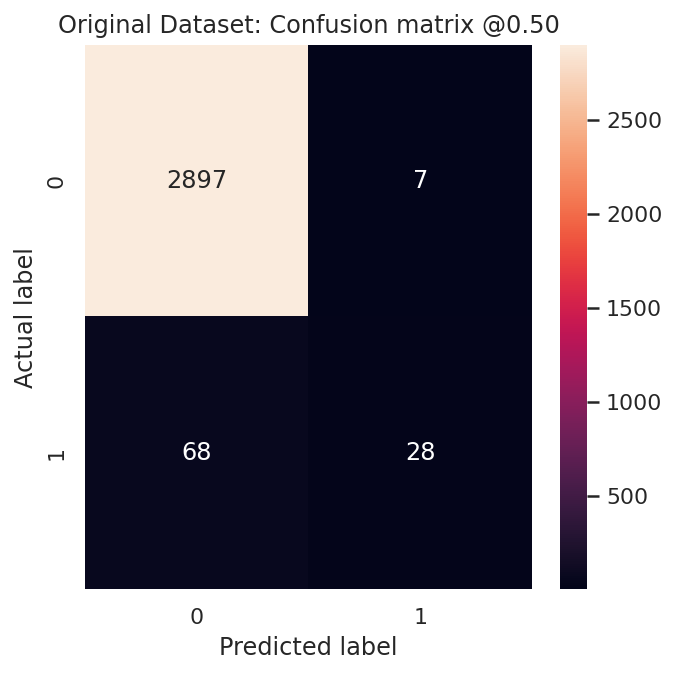

In [45]:
#plot Confusion Matrix for the Original Dataset
plot_cm(original_y_test, Original_Predictions, p=0.5, model="Original Dataset")

Non-Default Correctly Detected (True Negatives):  2893
Non-Default Incorrectly Detected (False Positives):  11
Default Missed (False Negatives):  67
Default Correctly Detected (True Positives):  29
Total Default Cases:  96
True Positive Rate (Recall): 0.3021
False Positive Rate: 0.0038


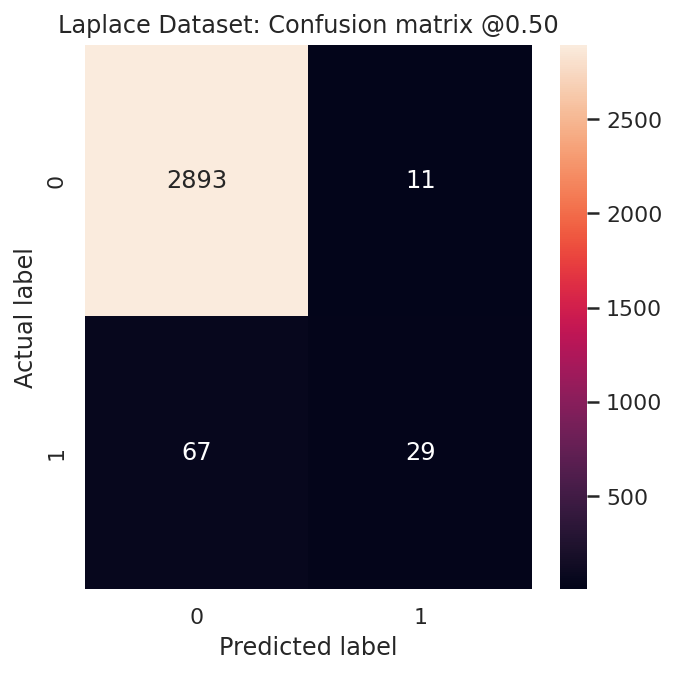

In [46]:
#plot Confusion Matrix for the dataset with Noise from Laplace Mechanism
plot_cm(laplace_y_test, Laplace_Predictions, p=0.5, model="Laplace Dataset")

In [47]:
def plot_roc(train_test, labels, predictions, **kwargs):
  fpr, tpr, _ = sklearn.metrics.roc_curve(labels, predictions)
  roc_auc = auc(fpr, tpr)


  #plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.plot(fpr, tpr, label="{} ROC curve (area = {:0.2f})".format(train_test, roc_auc), linewidth=2, **kwargs)
#  plt.plot(fpr[::10], tpr[::10], marker='h') 
  plt.xlabel('1-Specificity [%]')
  plt.ylabel('Sensitivity [%]')
  plt.xlim([0,1])
  plt.ylim([0,1])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')  

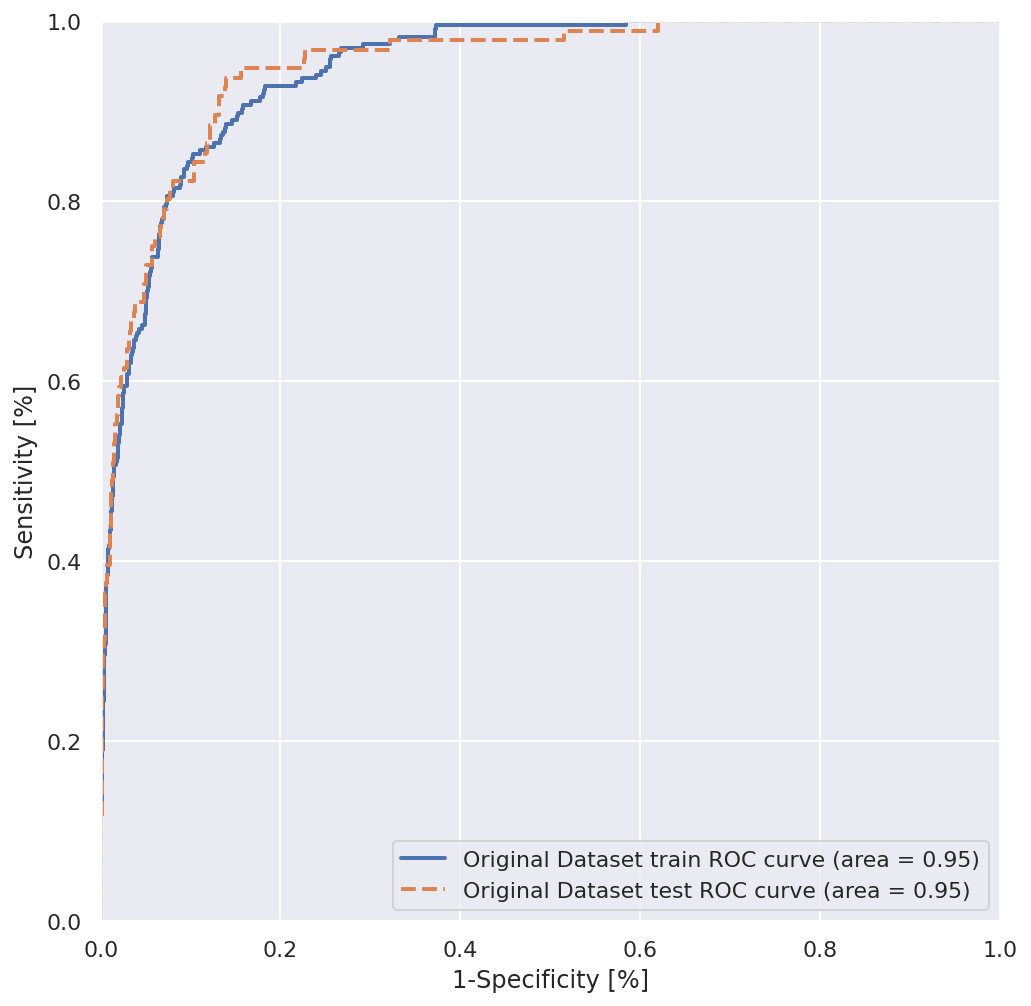

In [48]:
plot_roc(train_test= "Original Dataset train", labels=original_y_train, predictions=Original_training)
plot_roc(train_test= "Original Dataset test", labels=original_y_test, predictions=Original_Predictions, linestyle='--')
plt.legend(loc='lower right');

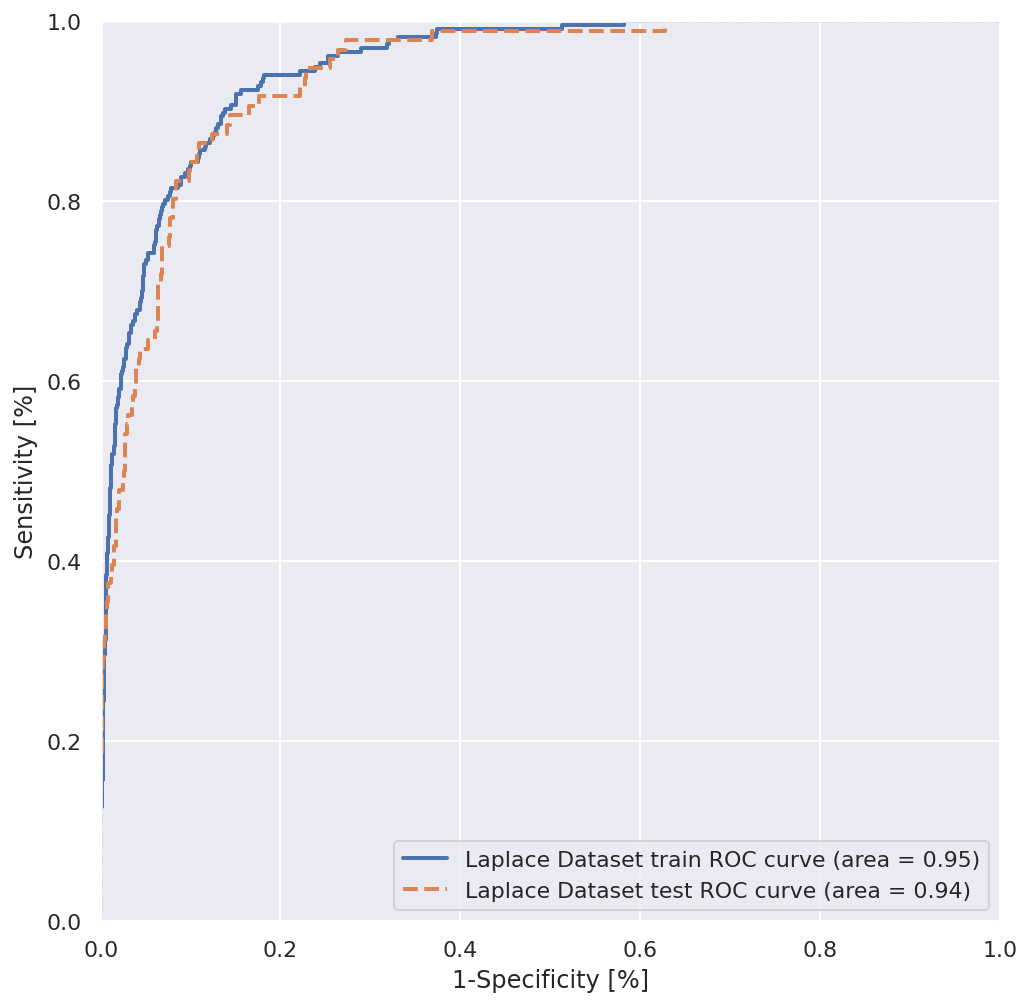

In [49]:
plot_roc(train_test= "Laplace Dataset train", labels=laplace_y_train, predictions=Laplace_training)
plot_roc(train_test= "Laplace Dataset test", labels=laplace_y_test, predictions=Laplace_Predictions, linestyle='--')
plt.legend(loc='lower right');

Now, comparing all these results, we do not observe material differences between the regression results on these two datasets.

Overall, we could conclude that Laplace mechanism would not materially affect the model result.


## References

- Dwork, C. (2008, 4). Differential Privacy A Survey of Results. Retrieved from Microsoft: https://www.microsoft.com/en-us/research/wp-content/uploads/2008/04/dwork_tamc.pdf

- European Commission. (n.d.). What personal data is considered sensitive? Retrieved from European Commission: https://commission.europa.eu/law/law-topic/data-protection/reform/rules-business-and-organisations/legal-grounds-processing-data/sensitive-data/what-personal-data-considered-sensitive_en#:~:text=personal%20data%20revealing%20racial%20or,sex%20life%20or%20

- Salaberry, N. (n.d.). Introducción a la Privacidad Diferencial con Python. Retrieved from Google Colab: https://colab.research.google.com/drive/1l-84B6F94HjFz1BJj-5D-qUBlvmTbScW?usp=sharing

- Vadhan, S. (2020, 5 16). The Science Behind WhiteNoise: Differential Privacy. Retrieved from YouTube: https://youtu.be/TMMHL-6ezkg

